## MO1

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Gpp = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_ASP/LandSat_Gpp.csv')
ndvi = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_ASP/LandSat_NDVI.csv')
Nppy = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_ASP/LandSat_Nppy.csv')

In [4]:
Gpp.shape

(105133, 6)

In [5]:
Gpp.head()

,system:index,Date,GPP,latitude,longitude,.geo
0,0,2.015010e+11,14.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
1,1,2.015012e+11,66.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
2,2,2.015020e+11,32.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
3,3,2.015022e+11,5.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
4,4,2.015031e+11,205.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."


In [6]:
Gpp.isna().sum()

,0
system:index,0
Date,0
GPP,2920
latitude,0
longitude,0
.geo,0


In [7]:
Gpp.dropna(inplace=True)

In [8]:
Gpp.drop(columns=['system:index'], inplace=True)
Gpp['GPP'] = Gpp['GPP'] * 0.0001
Gpp['Date'] = Gpp['Date'].astype(str)
Gpp['Date'] = Gpp['Date'].str[:8]
Gpp['Date'] = Gpp['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Gpp['Date'] = pd.to_datetime(Gpp['Date'], format='%Y%m%d', errors='coerce')
Gpp.head()

,Date,GPP,latitude,longitude,.geo
0,2015-01-01,0.0014,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
1,2015-01-16,0.0066,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
2,2015-02-01,0.0032,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
3,2015-02-17,0.0005,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
4,2015-03-06,0.0205,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."


In [9]:
Gpp['Year'] = Gpp['Date'].dt.year

In [10]:
Gpp.head()

,Date,GPP,latitude,longitude,.geo,Year
0,2015-01-01,0.0014,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015
1,2015-01-16,0.0066,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015
2,2015-02-01,0.0032,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015
3,2015-02-17,0.0005,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015
4,2015-03-06,0.0205,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015


In [11]:
Gppy = pd.DataFrame(Gpp.groupby(['Year','latitude','longitude'])['GPP'].sum()).reset_index()

In [12]:
Gppy.head()

,Year,latitude,longitude,GPP
0,2015,39.225611,-92.119313,1.4389
1,2015,39.225611,-92.119043,1.4266
2,2015,39.225611,-92.118774,1.4151
3,2015,39.225611,-92.118235,1.3880
4,2015,39.225611,-92.117965,1.4265


In [13]:
Gppy.rename(columns={'GPP': 'Gppy'}, inplace=True)

In [14]:
Gppy.shape

(4454, 4)

In [15]:
Gpp_merged = pd.merge(Gpp, Gppy, on=['Year', 'latitude','longitude'], how='inner')
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Year,Gppy
0,2015-01-01,0.0014,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015,1.4389
1,2015-01-16,0.0066,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015,1.4389
2,2015-02-01,0.0032,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015,1.4389
3,2015-02-17,0.0005,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015,1.4389
4,2015-03-06,0.0205,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",2015,1.4389


In [16]:
Gpp_merged.shape

(102213, 7)

In [17]:
Gpp_merged.drop(columns=['Year'],inplace=True)

In [18]:
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Gppy
0,2015-01-01,0.0014,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389
1,2015-01-16,0.0066,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389
2,2015-02-01,0.0032,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389
3,2015-02-17,0.0005,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389
4,2015-03-06,0.0205,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389


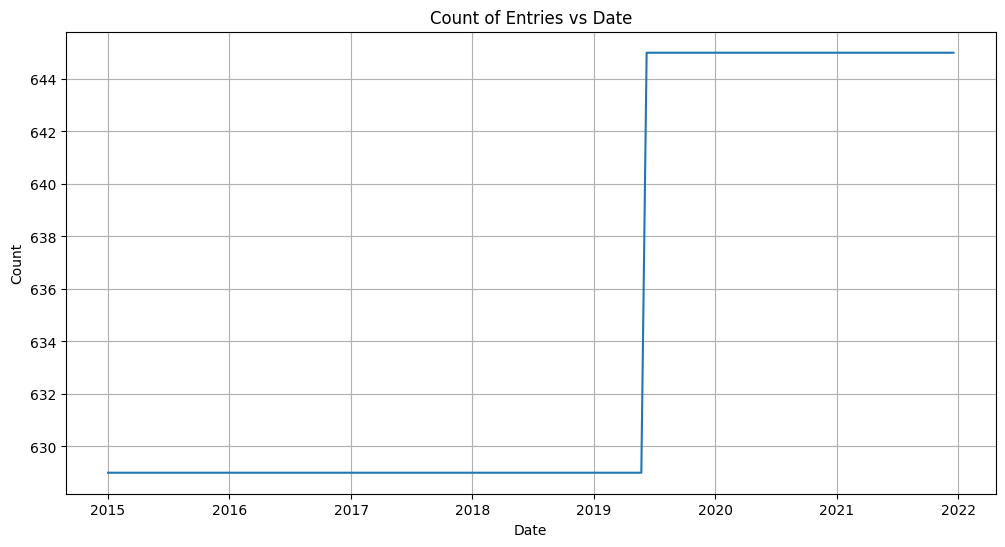

In [19]:
# Group by date and count the number of entries
date_counts = Gpp_merged.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date')
plt.grid(True)
plt.show()


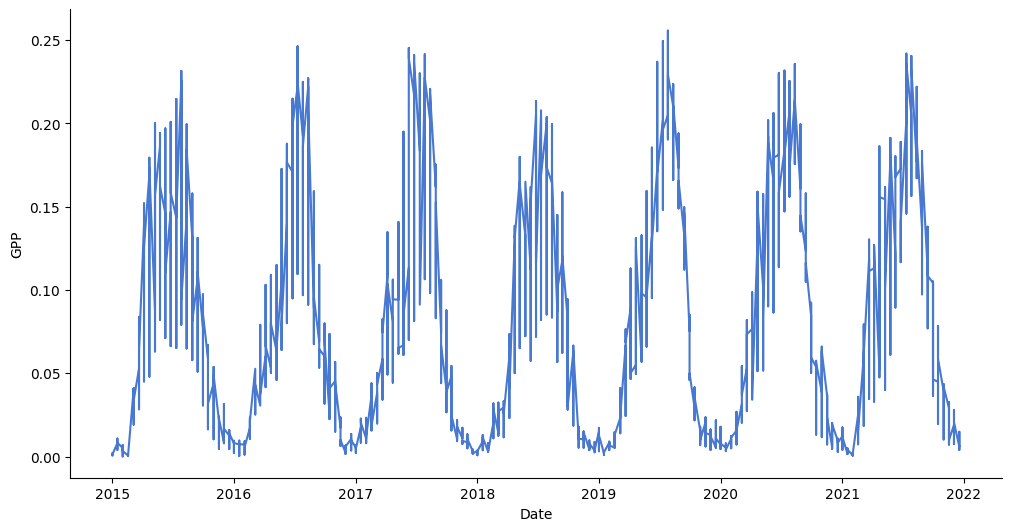

In [21]:
# @title Date vs GPP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('muted')
  xs = series['Date']
  ys = series['GPP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Gpp_merged.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('GPP')

In [22]:
unique_date_lat_lon = Gpp_merged[['latitude', 'longitude']].drop_duplicates()
print(unique_date_lat_lon)

         latitude  longitude
0       39.225611 -92.119313
161     39.225611 -92.119043
322     39.225611 -92.118774
483     39.225611 -92.118235
644     39.225611 -92.117965
...           ...        ...
101408  39.232887 -92.114192
101569  39.232887 -92.113923
101730  39.232887 -92.113653
101891  39.232887 -92.113384
102052  39.232887 -92.113114

[648 rows x 2 columns]


In [23]:
ndvi.head()

,system:index,Date,NDVI,latitude,longitude,.geo
0,0,2.015010e+11,NaN,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
1,1,2.015011e+11,NaN,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
2,2,2.015012e+11,0.172179,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
3,3,2.015012e+11,0.263277,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
4,4,2.015020e+11,NaN,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."


In [24]:
ndvi.shape

(210266, 6)

In [25]:
ndvi.isna().sum()

,0
system:index,0
Date,0
NDVI,155442
latitude,0
longitude,0
.geo,0


In [26]:
ndvi.dropna(inplace=True)

In [27]:
ndvi.drop(columns=['system:index'], inplace=True)
ndvi['NDVI'] = ndvi['NDVI']
ndvi['Date'] = ndvi['Date'].astype(str)
ndvi['Date'] = ndvi['Date'].str[:8]
ndvi['Date'] = ndvi['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
ndvi['Date'] = pd.to_datetime(ndvi['Date'], format='%Y%m%d', errors='coerce')
ndvi.head()

,Date,NDVI,latitude,longitude,.geo
2,2015-01-16,0.172179,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
3,2015-01-24,0.263277,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
5,2015-02-09,0.180739,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
8,2015-03-06,0.153081,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
9,2015-03-14,0.205084,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."


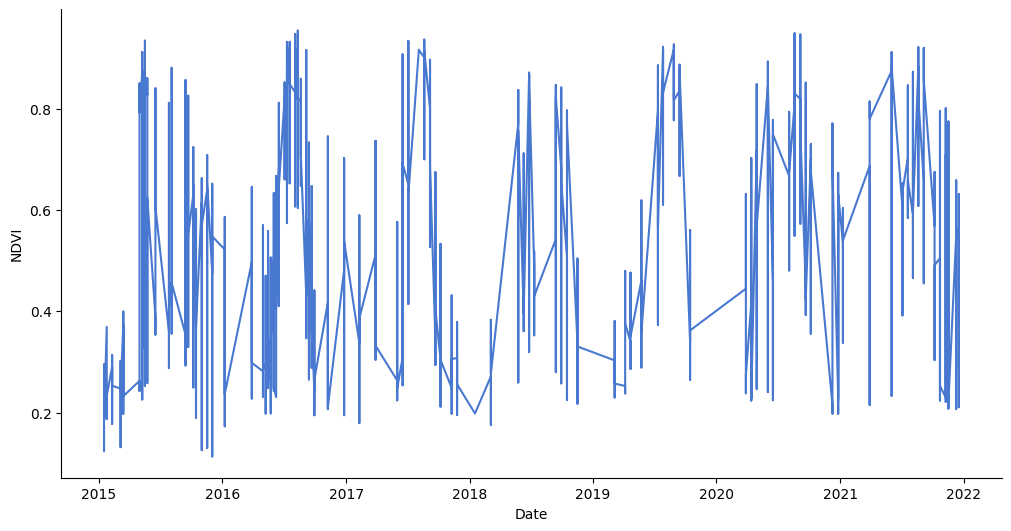

In [28]:
# @title Date vs NDVI

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('muted')
  xs = series['Date']
  ys = series['NDVI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ndvi.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NDVI')

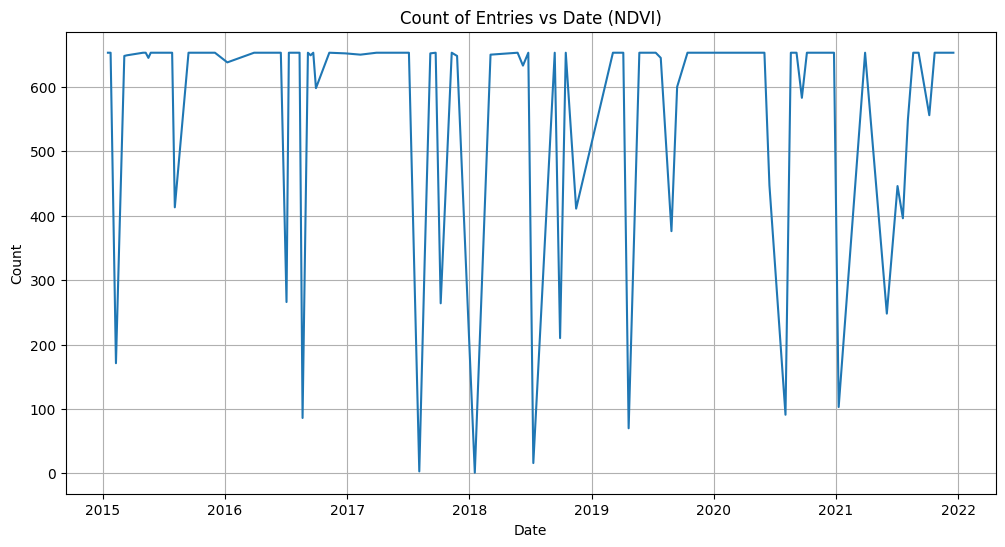

In [29]:
# Group by date and count the number of entries
date_counts_ndvi = ndvi.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts_ndvi.index, date_counts_ndvi.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date (NDVI)')
plt.grid(True)
plt.show()


In [30]:
ndvi.drop(columns=['.geo'],inplace=True)

In [31]:
#merge Gpp and NDVI on Date, latitude and longitude

merged_df = pd.merge(Gpp_merged, ndvi, on=['Date', 'latitude', 'longitude'], how='inner')
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI
0,2015-01-16,0.0066,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.172179
1,2015-03-06,0.0205,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.153081
2,2015-05-09,0.0985,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.344502
3,2015-05-24,0.1330,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.328267
4,2015-07-27,0.1661,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.639039


In [32]:
merged_df.shape

(21164, 7)

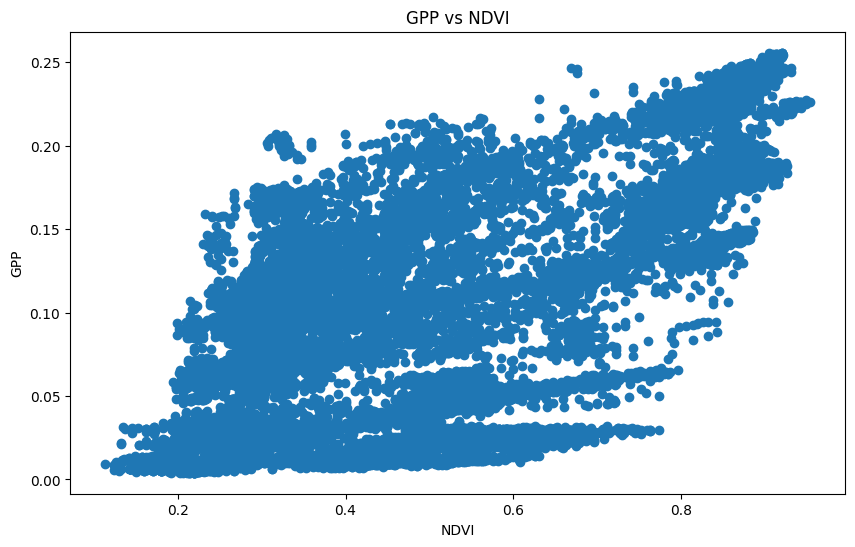

In [33]:
# @title GPP vs NDVI

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['NDVI'], merged_df['GPP'])
plt.xlabel('NDVI')
plt.ylabel('GPP')
_ = plt.title('GPP vs NDVI')


In [34]:
Nppy.shape

(3918, 6)

In [35]:
Nppy.isna().sum()

,0
system:index,0
Date,0
NPPy,112
latitude,0
longitude,0
.geo,0


In [36]:
Nppy.dropna(inplace=True)

In [37]:
Nppy.head()

,system:index,Date,NPPy,latitude,longitude,.geo
0,0,2.015010e+11,8622.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
1,1,2.016010e+11,9098.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
2,2,2.017010e+11,9222.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
3,3,2.018010e+11,7948.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
4,4,2.019010e+11,10019.0,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."


In [38]:
Nppy.drop(columns=['system:index'], inplace=True)
Nppy['NPPy'] = Nppy['NPPy']*0.0001
Nppy['Date'] = Nppy['Date'].astype(str)
Nppy['Date'] = Nppy['Date'].str[:8]
Nppy['Date'] = Nppy['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Nppy['Date'] = pd.to_datetime(Nppy['Date'], format='%Y%m%d', errors='coerce')
Nppy.head()

,Date,NPPy,latitude,longitude,.geo
0,2015-01-01,0.8622,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
1,2016-01-01,0.9098,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
2,2017-01-01,0.9222,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
3,2018-01-01,0.7948,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."
4,2019-01-01,1.0019,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178..."


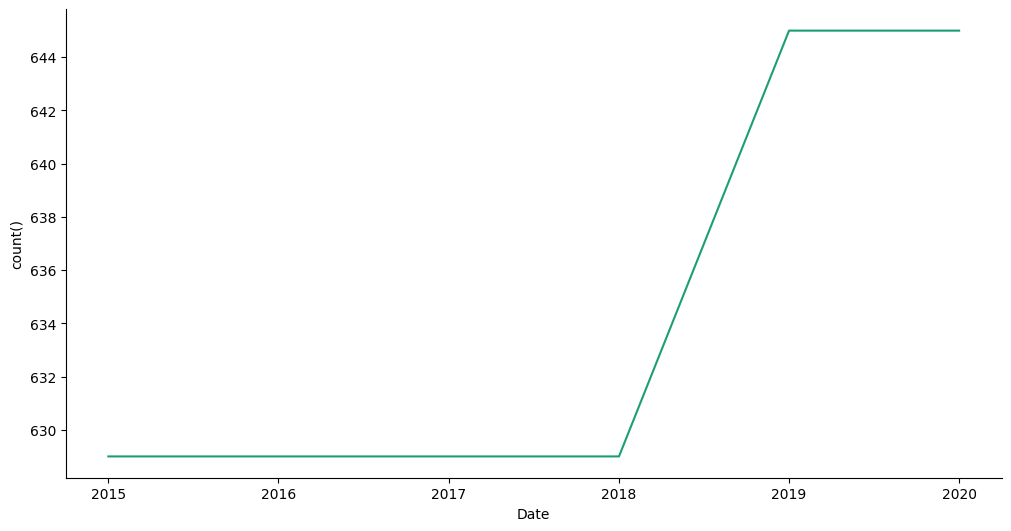

In [39]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

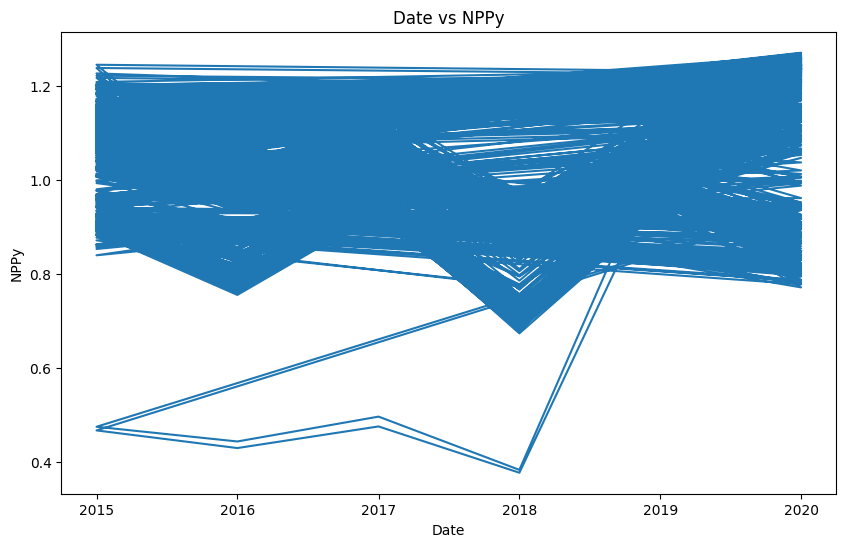

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(Nppy['Date'], Nppy['NPPy'])
plt.xlabel('Date')
plt.ylabel('NPPy')
plt.title('Date vs NPPy')
plt.show()

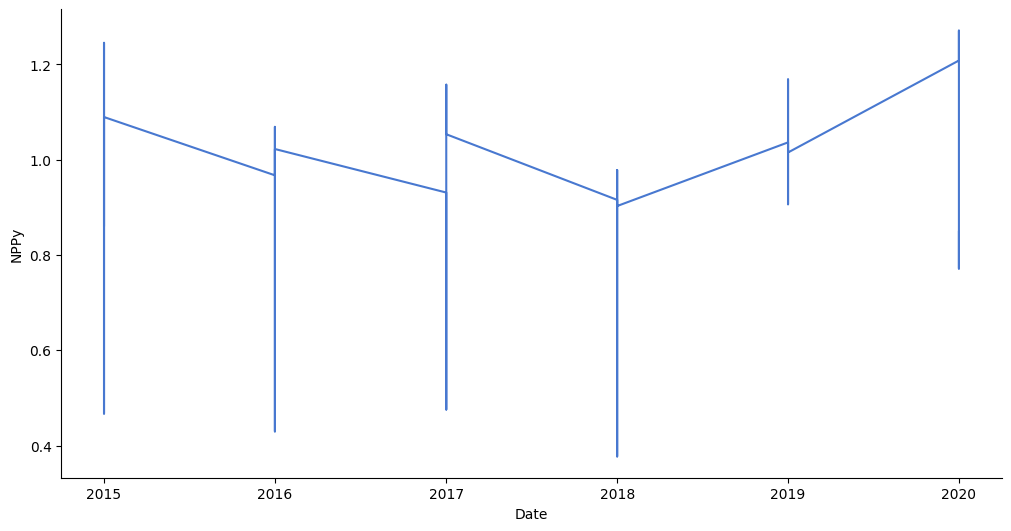

In [41]:
# @title Date vs NPPy

def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('muted')
  xs = series['Date']
  ys = series['NPPy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NPPy')


In [ ]:
Nppy.drop(columns=['.geo'], inplace=True)

In [ ]:
# Extract year from the 'Date' column and create a new 'year' column
Nppy['year'] = Nppy['Date'].dt.year


In [ ]:
Nppy.head()

,Date,NPPy,latitude,longitude,year
0,2015-01-01,0.8622,39.225611,-92.119313,2015
1,2016-01-01,0.9098,39.225611,-92.119313,2016
2,2017-01-01,0.9222,39.225611,-92.119313,2017
3,2018-01-01,0.7948,39.225611,-92.119313,2018
4,2019-01-01,1.0019,39.225611,-92.119313,2019


In [ ]:
Nppy.drop(columns=['Date'], inplace=True)

In [ ]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year
0,2015-01-16,0.0066,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.172179,2015
1,2015-03-06,0.0205,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.153081,2015
2,2015-05-09,0.0985,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.344502,2015
3,2015-05-24,0.1330,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.328267,2015
4,2015-07-27,0.1661,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.639039,2015


In [ ]:
merged_data = pd.merge(merged_df, Nppy, on=['year', 'latitude', 'longitude'], how='inner')
merged_data.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year,NPPy
0,2015-01-16,0.0066,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.172179,2015,0.8622
1,2015-03-06,0.0205,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.153081,2015,0.8622
2,2015-05-09,0.0985,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.344502,2015,0.8622
3,2015-05-24,0.1330,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.328267,2015,0.8622
4,2015-07-27,0.1661,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",1.4389,0.639039,2015,0.8622


In [ ]:
# Rearrange the columns in the desired order
new_column_order = ['Date', 'latitude', 'longitude', '.geo', 'GPP', 'NDVI', 'Gppy', 'NPPy']
merged_data = merged_data[new_column_order]

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-01-16,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0066,0.172179,1.4389,0.8622
1,2015-03-06,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0205,0.153081,1.4389,0.8622
2,2015-05-09,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0985,0.344502,1.4389,0.8622
3,2015-05-24,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.1330,0.328267,1.4389,0.8622
4,2015-07-27,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.1661,0.639039,1.4389,0.8622


In [ ]:
merged_data.shape

(19865, 8)

In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0


In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-01-16,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0066,0.172179,1.4389,0.8622
1,2015-03-06,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0205,0.153081,1.4389,0.8622
2,2015-05-09,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0985,0.344502,1.4389,0.8622
3,2015-05-24,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.1330,0.328267,1.4389,0.8622
4,2015-07-27,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.1661,0.639039,1.4389,0.8622


In [ ]:
merged_data['Npp'] = (merged_data['GPP'] / merged_data['Gppy']) * merged_data['NPPy']

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp
0,2015-01-16,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0066,0.172179,1.4389,0.8622,0.003955
1,2015-03-06,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0205,0.153081,1.4389,0.8622,0.012284
2,2015-05-09,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0985,0.344502,1.4389,0.8622,0.059022
3,2015-05-24,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.1330,0.328267,1.4389,0.8622,0.079695
4,2015-07-27,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.1661,0.639039,1.4389,0.8622,0.099528


In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0


In [ ]:
merged_data.shape

(19865, 9)

In [ ]:
# Export the dataframe to a CSV file
merged_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_ASP/Missouri_ASP_satellite_data.csv', index=False)


# Weather data from Flux towers

In [ ]:
arm_data = pd.read_csv('/content/drive/Shareddrives/DATA298B/Ameriflux data/Missouri/US-Mo1.csv', skiprows=2)
arm_data

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,H_1_1_1,H_PI_F_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,NEE_PI,NEE_PI_F,GPP_PI_F,...,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1,TA_PI_F_1_1_1
0,201501010000,201501010030,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.000000,...,-9999.000000,-9999.000000,-9999.00000,-9999.0,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
1,201501010030,201501010100,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.000000,...,-9999.000000,-9999.000000,-9999.00000,-9999.0,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
2,201501010100,201501010130,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.000000,...,-9999.000000,-9999.000000,-9999.00000,-9999.0,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
3,201501010130,201501010200,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.000000,...,-9999.000000,-9999.000000,-9999.00000,-9999.0,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
4,201501010200,201501010230,-9999.00000,-9999.0000,-9999.0000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.000000,...,-9999.000000,-9999.000000,-9999.00000,-9999.0,-9999.00000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157770,202312312100,202312312130,0.91126,-5.3270,-5.3270,15.653,15.653,0.91126,0.91126,-0.199170,...,1.674354,2.736269,-15.91949,-9999.0,-18.95488,-13.55343,-2.912839,-2.278212,37.69749,-0.16929
157771,202312312130,202312312200,0.74472,-3.4801,-3.4801,11.871,11.871,0.74472,0.74472,-0.039347,...,1.645388,2.712945,-15.96673,-9999.0,-19.07144,-13.68579,-3.190700,-2.262687,37.64019,-0.24248
157772,202312312200,202312312230,0.90501,-4.1373,-4.1373,14.586,14.586,0.90501,0.90501,-0.207380,...,1.618399,2.683494,-15.93537,-9999.0,-19.02491,-13.77134,-2.630589,-2.105900,37.58439,-0.33364
157773,202312312230,202312312300,0.96611,-3.2581,-3.2581,15.052,15.052,0.96611,0.96611,-0.274400,...,1.590611,2.658479,-15.94942,-9999.0,-19.01558,-13.90678,-2.629162,-2.166077,37.53825,-0.39486


In [ ]:
arm_data=arm_data.drop('TIMESTAMP_START',axis=1)

arm_data=arm_data.rename(columns={'TIMESTAMP_END': 'TIMESTAMP'})
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'], format='%Y%m%d%H%M')
arm_data = arm_data[(arm_data['TIMESTAMP'].dt.year >= 2015) & (arm_data['TIMESTAMP'].dt.year <= 2021)]
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date
data = arm_data

<ipython-input-59-2cc50464675b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
<ipython-input-59-2cc50464675b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date


In [ ]:
# Define the column range to check (excluding the Date column)
cols_to_check = data.columns[2:]  # This excludes the Date column

# Use apply with a lambda function to check if all values from Col1 to Col149 are -9999.0
rows_to_keep = data[cols_to_check].apply(lambda row: not (row == -9999.0).all(), axis=1)

# Filter the DataFrame to retain rows where not all values are -9999.0
data= data[rows_to_keep]
data

,TIMESTAMP,FC_1_1_1,H_1_1_1,H_PI_F_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,NEE_PI,NEE_PI_F,GPP_PI_F,RECO_PI,...,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1,TA_PI_F_1_1_1
13104,2015-10-01,2.93580,-32.17200,-32.17200,-9999.000,6.7062,-9999.00000,1.52900,-0.210830,1.318159,...,14.861960,18.308390,-25.588820,-38.329150,-38.754380,-28.325520,-9.788728,-10.356426,29.63230,9.6578
13105,2015-10-01,1.64880,-24.85500,-24.85500,-9999.000,6.7062,-9999.00000,1.52900,-0.202140,1.326843,...,14.673030,18.174230,-25.776070,-38.593340,-39.082730,-28.496510,-10.305062,-10.405597,29.63925,9.7730
13106,2015-10-01,1.76110,-25.13100,-25.13100,-9999.000,6.7219,-9999.00000,1.53310,-0.246850,1.286226,...,14.486850,18.042480,-26.127710,-39.205490,-39.608330,-28.962380,-8.042312,-10.249383,29.57778,9.2315
13107,2015-10-01,1.91680,-24.27400,-24.27400,-9999.000,6.2772,-9999.00000,1.53320,-0.274620,1.258543,...,14.267560,17.911760,-26.565380,-39.910900,-40.200170,-29.429870,-10.754145,-12.073154,29.57658,8.8588
13108,2015-10-01,1.65220,-30.88800,-30.88800,-9999.000,5.5610,-9999.00000,1.51830,-0.266140,1.252136,...,14.035670,17.782560,-26.869470,-40.292430,-40.623120,-29.713170,-12.130013,-12.750113,29.58014,8.7720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122730,2021-12-31,1.51950,2.50860,2.50860,10.238,10.2380,1.51950,1.51950,-0.102470,1.417069,...,6.243050,6.353306,-1.908942,-4.378989,-1.828332,-2.520601,-5.451458,-5.816829,26.18486,4.3477
122731,2021-12-31,1.54850,4.51580,4.51580,12.730,12.7300,1.54850,1.54850,-0.221870,1.326615,...,6.174434,6.327367,-2.383832,-4.666703,-2.404456,-3.265534,-4.041427,-4.230957,26.12986,3.4389
122732,2021-12-31,1.26600,4.82710,4.82710,14.040,14.0400,1.26600,1.26600,-0.005373,1.260654,...,6.071867,6.301178,-3.023038,-5.403529,-3.136305,-4.320585,-5.597670,-6.324672,26.11981,2.7627
122733,2021-12-31,1.10170,4.63730,4.63730,14.009,14.0090,1.10170,1.10170,0.104750,1.206403,...,5.948242,6.274137,-3.820843,-6.443242,-3.996547,-5.570317,-6.815738,-7.621745,26.11986,2.1967


In [ ]:
# Function to rename columns by replacing '_IN_' with 'IN' and '_OUT_' with 'OUT'
def rename_in_out_columns(col_name):
    if '_IN_' in col_name:
        return col_name.replace('_IN_', 'IN_')
    elif '_OUT_' in col_name:
        return col_name.replace('_OUT_', 'OUT_')
    else:
        return col_name

# Apply the function to all columns
data.columns = [rename_in_out_columns(col) for col in arm_data.columns]

# Display the first few rows to check the results
data.head()

,TIMESTAMP,FC_1_1_1,H_1_1_1,H_PI_F_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,NEE_PI,NEE_PI_F,GPP_PI_F,RECO_PI,...,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1,TA_PI_F_1_1_1
13104,2015-10-01,2.9358,-32.172,-32.172,-9999.0,6.7062,-9999.0,1.5290,-0.21083,1.318159,...,14.86196,18.30839,-25.58882,-38.32915,-38.75438,-28.32552,-9.788728,-10.356426,29.63230,9.6578
13105,2015-10-01,1.6488,-24.855,-24.855,-9999.0,6.7062,-9999.0,1.5290,-0.20214,1.326843,...,14.67303,18.17423,-25.77607,-38.59334,-39.08273,-28.49651,-10.305062,-10.405597,29.63925,9.7730
13106,2015-10-01,1.7611,-25.131,-25.131,-9999.0,6.7219,-9999.0,1.5331,-0.24685,1.286226,...,14.48685,18.04248,-26.12771,-39.20549,-39.60833,-28.96238,-8.042312,-10.249383,29.57778,9.2315
13107,2015-10-01,1.9168,-24.274,-24.274,-9999.0,6.2772,-9999.0,1.5332,-0.27462,1.258543,...,14.26756,17.91176,-26.56538,-39.91090,-40.20017,-29.42987,-10.754145,-12.073154,29.57658,8.8588
13108,2015-10-01,1.6522,-30.888,-30.888,-9999.0,5.5610,-9999.0,1.5183,-0.26614,1.252136,...,14.03567,17.78256,-26.86947,-40.29243,-40.62312,-29.71317,-12.130013,-12.750113,29.58014,8.7720


In [ ]:
# Replace -9999.0 with NaN
data.replace(-9999.0, np.nan, inplace=True)

# Count missing values (NaNs) in each column
missing_values_count = data.isnull().sum()

# Calculate percentage of missing values in each column
missing_values_percent = (missing_values_count / len(data)) * 100

# Drop columns where missing values exceed 50%
data = data.drop(columns=missing_values_percent[missing_values_percent > 40].index)

# Ensure pandas shows all columns
pd.set_option('display.max_columns', None)
data

<ipython-input-62-d87ba21fc32d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(-9999.0, np.nan, inplace=True)


,TIMESTAMP,FC_1_1_1,H_1_1_1,H_PI_F_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,NEE_PI,NEE_PI_F,GPP_PI_F,RECO_PI,TAU_1_1_1,USTAR_1_1_1,CO2_1_1_1,CO2_MIXING_RATIO_1_1_1,H2O_1_1_1,H2O_MIXING_RATIO_1_1_1,H2O_SIGMA_1_1_1,CO2_SIGMA_1_1_1,WD_1_1_1,WS_1_1_1,U_SIGMA_1_1_1,V_SIGMA_1_1_1,W_SIGMA_1_1_1,PA_1_1_1,RH_1_1_1,VPD_PI_1_1_1,TA_1_1_1,P_1_1_1,PPFDIN_1_1_1,SWIN_1_1_1,SWOUT_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,NETRAD_1_1_1,MO_LENGTH_1_1_1,T_SONIC_1_1_1,T_SONIC_SIGMA_1_1_1,TS_1_1_1,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1,TA_PI_F_1_1_1
13104,2015-10-01,2.93580,-32.17200,-32.17200,NaN,6.7062,NaN,1.52900,-0.210830,1.318159,-0.042903,0.187796,386.944641,390.604012,7.600472,7.672350,0.154693,1.795538,51.32733,2.010127,0.508095,0.379107,0.247603,99.08916,77.40246,2.710100,9.6578,0.0,0.061939,0.0,2.637705,280.9713,351.5651,-76.073200,18.412039,11.138390,0.355029,15.766880,14.861960,18.308390,-25.588820,-38.329150,-38.754380,-28.325520,-9.788728,-10.356426,29.63230,9.6578
13105,2015-10-01,1.64880,-24.85500,-24.85500,NaN,6.7062,NaN,1.52900,-0.202140,1.326843,-0.031868,0.161853,384.795425,388.303590,7.314152,7.380835,0.040975,1.748229,49.87817,1.635979,0.493368,0.351798,0.189768,99.11785,74.07915,3.133300,9.7730,0.0,0.056725,0.0,2.499909,280.6111,348.6102,-73.611990,15.120879,11.193040,0.453553,15.579790,14.673030,18.174230,-25.776070,-38.593340,-39.082730,-28.496510,-10.305062,-10.405597,29.63925,9.7730
13106,2015-10-01,1.76110,-25.13100,-25.13100,NaN,6.7219,NaN,1.53310,-0.246850,1.286226,-0.025535,0.144721,383.903707,387.323772,7.125254,7.188730,0.050485,1.531337,48.02869,1.607212,0.458576,0.288259,0.179392,99.13910,75.11029,2.900700,9.2315,0.0,0.059854,0.0,2.301799,278.9921,345.9901,-72.284010,10.666166,10.662080,0.414997,15.433690,14.486850,18.042480,-26.127710,-39.205490,-39.608330,-28.962380,-8.042312,-10.249383,29.57778,9.2315
13107,2015-10-01,1.91680,-24.27400,-24.27400,NaN,6.2772,NaN,1.53320,-0.274620,1.258543,-0.024541,0.141778,383.967843,387.360459,7.047150,7.109416,0.022684,1.859017,54.24756,1.485700,0.398136,0.280779,0.184264,99.14193,76.39680,2.682600,8.8588,0.0,0.056102,0.0,2.526915,276.8651,344.4140,-73.043130,10.341135,10.240320,0.484642,15.238360,14.267560,17.911760,-26.565380,-39.910900,-40.200170,-29.429870,-10.754145,-12.073154,29.57658,8.8588
13108,2015-10-01,1.65220,-30.88800,-30.88800,NaN,5.5610,NaN,1.51830,-0.266140,1.252136,-0.056579,0.215258,382.979112,386.371025,7.044225,7.106613,0.033608,1.081042,62.00418,1.972717,0.590860,0.347679,0.232255,99.12585,77.02633,2.595400,8.7720,0.0,0.061735,0.0,2.940138,275.4620,345.9639,-76.059470,28.486533,10.171850,0.323218,15.017750,14.035670,17.782560,-26.869470,-40.292430,-40.623120,-29.713170,-12.130013,-12.750113,29.58014,8.7720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122730,2021-12-31,1.51950,2.50860,2.50860,10.238,10.2380,1.51950,1.51950,-0.102470,1.417069,-0.113468,0.305052,424.154598,427.815159,6.884612,6.944028,0.130997,0.316764,100.04400,4.679488,1.027330,0.952666,0.378247,97.42496,100.00000,0.000000,4.3477,0.0,0.108770,0.0,-0.343521,329.4044,335.6860,-6.711092,-794.469983,6.911019,0.328180,6.362965,6.243050,6.353306,-1.908942,-4.378989,-1.828332,-2.520601,-5.451458,-5.816829,26.18486,4.3477
122731,2021-12-31,1.54850,4.51580,4.51580,12.730,12.7300,1.54850,1.54850,-0.221870,1.326615,-0.123843,0.318085,422.248796,425.663717,6.421543,6.473477,0.109618,0.337288,91.37201,5.036444,1.108454,0.878793,0.398137,97.45798,100.00000,0.000000,3.4389,0.0,0.107312,0.0,-0.386631,325.9477,332.0042,-6.484256,-532.000325,5.948490,0.175740,6.297423,6.174434,6.327367,-2.383832,-4.666703,-2.404456,-3.265534,-4.041427,-4.230957,26.12986,3.4389
122732,2021-12-31,1.26600,4.82710,4.82710,14.040,14.0400,1.26600,1.26600,-0.005373,1.260654,-0.119629,0.312102,421.234228,424.477600,5.958696,6.004576,0.114840,0.491717,96.02362,4.791029,1

In [ ]:
fc_columns = [col for col in data.columns if 'FC' in col]
pi_columns = [col for col in data.columns if '_PI_F' in col]
data=data.drop(pi_columns, axis=1)
data

,TIMESTAMP,FC_1_1_1,H_1_1_1,LE_1_1_1,NEE_PI,RECO_PI,TAU_1_1_1,USTAR_1_1_1,CO2_1_1_1,CO2_MIXING_RATIO_1_1_1,H2O_1_1_1,H2O_MIXING_RATIO_1_1_1,H2O_SIGMA_1_1_1,CO2_SIGMA_1_1_1,WD_1_1_1,WS_1_1_1,U_SIGMA_1_1_1,V_SIGMA_1_1_1,W_SIGMA_1_1_1,PA_1_1_1,RH_1_1_1,VPD_PI_1_1_1,TA_1_1_1,P_1_1_1,PPFDIN_1_1_1,SWIN_1_1_1,SWOUT_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,NETRAD_1_1_1,MO_LENGTH_1_1_1,T_SONIC_1_1_1,T_SONIC_SIGMA_1_1_1,TS_1_1_1,TS_2_1_1,TS_3_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,SG_1_1_1,SG_2_1_1,SWC_1_1_1
13104,2015-10-01,2.93580,-32.17200,NaN,NaN,1.318159,-0.042903,0.187796,386.944641,390.604012,7.600472,7.672350,0.154693,1.795538,51.32733,2.010127,0.508095,0.379107,0.247603,99.08916,77.40246,2.710100,9.6578,0.0,0.061939,0.0,2.637705,280.9713,351.5651,-76.073200,18.412039,11.138390,0.355029,15.766880,14.861960,18.308390,-25.588820,-38.329150,-38.754380,-28.325520,-9.788728,-10.356426,29.63230
13105,2015-10-01,1.64880,-24.85500,NaN,NaN,1.326843,-0.031868,0.161853,384.795425,388.303590,7.314152,7.380835,0.040975,1.748229,49.87817,1.635979,0.493368,0.351798,0.189768,99.11785,74.07915,3.133300,9.7730,0.0,0.056725,0.0,2.499909,280.6111,348.6102,-73.611990,15.120879,11.193040,0.453553,15.579790,14.673030,18.174230,-25.776070,-38.593340,-39.082730,-28.496510,-10.305062,-10.405597,29.63925
13106,2015-10-01,1.76110,-25.13100,NaN,NaN,1.286226,-0.025535,0.144721,383.903707,387.323772,7.125254,7.188730,0.050485,1.531337,48.02869,1.607212,0.458576,0.288259,0.179392,99.13910,75.11029,2.900700,9.2315,0.0,0.059854,0.0,2.301799,278.9921,345.9901,-72.284010,10.666166,10.662080,0.414997,15.433690,14.486850,18.042480,-26.127710,-39.205490,-39.608330,-28.962380,-8.042312,-10.249383,29.57778
13107,2015-10-01,1.91680,-24.27400,NaN,NaN,1.258543,-0.024541,0.141778,383.967843,387.360459,7.047150,7.109416,0.022684,1.859017,54.24756,1.485700,0.398136,0.280779,0.184264,99.14193,76.39680,2.682600,8.8588,0.0,0.056102,0.0,2.526915,276.8651,344.4140,-73.043130,10.341135,10.240320,0.484642,15.238360,14.267560,17.911760,-26.565380,-39.910900,-40.200170,-29.429870,-10.754145,-12.073154,29.57658
13108,2015-10-01,1.65220,-30.88800,NaN,NaN,1.252136,-0.056579,0.215258,382.979112,386.371025,7.044225,7.106613,0.033608,1.081042,62.00418,1.972717,0.590860,0.347679,0.232255,99.12585,77.02633,2.595400,8.7720,0.0,0.061735,0.0,2.940138,275.4620,345.9639,-76.059470,28.486533,10.171850,0.323218,15.017750,14.035670,17.782560,-26.869470,-40.292430,-40.623120,-29.713170,-12.130013,-12.750113,29.58014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122730,2021-12-31,1.51950,2.50860,10.238,1.51950,1.417069,-0.113468,0.305052,424.154598,427.815159,6.884612,6.944028,0.130997,0.316764,100.04400,4.679488,1.027330,0.952666,0.378247,97.42496,100.00000,0.000000,4.3477,0.0,0.108770,0.0,-0.343521,329.4044,335.6860,-6.711092,-794.469983,6.911019,0.328180,6.362965,6.243050,6.353306,-1.908942,-4.378989,-1.828332,-2.520601,-5.451458,-5.816829,26.18486
122731,2021-12-31,1.54850,4.51580,12.730,1.54850,1.326615,-0.123843,0.318085,422.248796,425.663717,6.421543,6.473477,0.109618,0.337288,91.37201,5.036444,1.108454,0.878793,0.398137,97.45798,100.00000,0.000000,3.4389,0.0,0.107312,0.0,-0.386631,325.9477,332.0042,-6.484256,-532.000325,5.948490,0.175740,6.297423,6.174434,6.327367,-2.383832,-4.666703,-2.404456,-3.265534,-4.041427,-4.230957,26.12986
122732,2021-12-31,1.26600,4.82710,14.040,1.26600,1.260654,-0.119629,0.312102,421.234228,424.477600,5.958696,6.004576,0.114840,0.491717,96.02362,4.791029,1.059835,0.900468,0.389813,97.53287,100.00000,0.000000,2.7627,0.0,0.106900,0.0,-0.284953,320.6244,328.7816,-8.701272,-468.795742,5.219202,0.212340,6.206645,6.071867,6.301178,-3.023038,-5.403529,-3.136305,-4.320585,-5.597670,-6.324672,26.11981
122733,2021-12-31,1.10170,4.63730,14.009,1.10170,1.206403,-0.100020,0.285041,421.692439,424.790839,5.644501,5.685974,0.099687,0.398478,97.41275,4.164424,0.933766,0

In [ ]:
# Extract unique parameters and heights from column names
column_names = data.columns
parameters = set()
heights = set()

# Identify parameters and heights based on column names
for col in column_names:
    parts = col.split('_')
    if len(parts) > 1:
        parameters.add(parts[0])
        heights.add('_'.join(parts[1:]))

# Convert sets to sorted lists
parameters = sorted(parameters)
heights = sorted(heights)

# Create new columns for maximum values
for param in parameters:
    # Collect column names for this parameter across all heights
    columns = [f'{param}_{height}' for height in heights if f'{param}_{height}' in data.columns]

    if columns:
        # Create a new column for the maximum value of this parameter across heights
        data[f'{param}'] = data[columns].max(axis=1)

# Optionally, drop the original columns if needed
data.drop(columns=[f'{param}_{height}' for param in parameters for height in heights if f'{param}_{height}' in data.columns], inplace=True)
# Reorder columns to place 'timestamp' as the first column
if 'TIMESTAMP' in data.columns:
    cols = ['TIMESTAMP'] + [col for col in data.columns if col != 'TIMESTAMP']
    data = data[cols]
# Display the first few rows to check the results
data

,TIMESTAMP,CO2,FC,G,H,H2O,LE,LWIN,LWOUT,MO,NEE,NETRAD,P,PA,PPFDIN,RECO,RH,SG,SWC,SWIN,SWOUT,T,TA,TAU,TS,U,USTAR,V,VPD,W,WD,WS
13104,2015-10-01,390.604012,2.93580,-25.588820,-32.17200,7.672350,NaN,280.9713,351.5651,18.412039,NaN,-76.073200,0.0,99.08916,0.061939,1.318159,77.40246,-9.788728,29.63230,0.0,2.637705,11.138390,9.6578,-0.042903,18.308390,0.508095,0.187796,0.379107,2.710100,0.247603,51.32733,2.010127
13105,2015-10-01,388.303590,1.64880,-25.776070,-24.85500,7.380835,NaN,280.6111,348.6102,15.120879,NaN,-73.611990,0.0,99.11785,0.056725,1.326843,74.07915,-10.305062,29.63925,0.0,2.499909,11.193040,9.7730,-0.031868,18.174230,0.493368,0.161853,0.351798,3.133300,0.189768,49.87817,1.635979
13106,2015-10-01,387.323772,1.76110,-26.127710,-25.13100,7.188730,NaN,278.9921,345.9901,10.666166,NaN,-72.284010,0.0,99.13910,0.059854,1.286226,75.11029,-8.042312,29.57778,0.0,2.301799,10.662080,9.2315,-0.025535,18.042480,0.458576,0.144721,0.288259,2.900700,0.179392,48.02869,1.607212
13107,2015-10-01,387.360459,1.91680,-26.565380,-24.27400,7.109416,NaN,276.8651,344.4140,10.341135,NaN,-73.043130,0.0,99.14193,0.056102,1.258543,76.39680,-10.754145,29.57658,0.0,2.526915,10.240320,8.8588,-0.024541,17.911760,0.398136,0.141778,0.280779,2.682600,0.184264,54.24756,1.485700
13108,2015-10-01,386.371025,1.65220,-26.869470,-30.88800,7.106613,NaN,275.4620,345.9639,28.486533,NaN,-76.059470,0.0,99.12585,0.061735,1.252136,77.02633,-12.130013,29.58014,0.0,2.940138,10.171850,8.7720,-0.056579,17.782560,0.590860,0.215258,0.347679,2.595400,0.232255,62.00418,1.972717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122730,2021-12-31,427.815159,1.51950,-1.828332,2.50860,6.944028,10.238,329.4044,335.6860,-794.469983,1.51950,-6.711092,0.0,97.42496,0.108770,1.417069,100.00000,-5.451458,26.18486,0.0,-0.343521,6.911019,4.3477,-0.113468,6.362965,1.027330,0.305052,0.952666,0.000000,0.378247,100.04400,4.679488
122731,2021-12-31,425.663717,1.54850,-2.383832,4.51580,6.473477,12.730,325.9477,332.0042,-532.000325,1.54850,-6.484256,0.0,97.45798,0.107312,1.326615,100.00000,-4.041427,26.12986,0.0,-0.386631,5.948490,3.4389,-0.123843,6.327367,1.108454,0.318085,0.878793,0.000000,0.398137,91.37201,5.036444
122732,2021-12-31,424.477600,1.26600,-3.023038,4.82710,6.004576,14.040,320.6244,328.7816,-468.795742,1.26600,-8.701272,0.0,97.53287,0.106900,1.260654,100.00000,-5.597670,26.11981,0.0,-0.284953,5.219202,2.7627,-0.119629,6.301178,1.059835,0.312102,0.900468,0.000000,0.389813,96.02362,4.791029
122733,2021-12-31,424.790839,1.10170,-3.820843,4.63730,5.685974,14.009,315.1332,326.1036,-370.245756,1.10170,-11.697360,0.0,97.55045,0.101686,1.206403,99.44740,-6.815738,26.11986,0.0,-0.123220,4.632794,2.1967,-0.100020,6.274137,0.933766,0.285041,0.730549,0.039535,0.341050,97.41275,4.164424


In [ ]:
print(data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH','P']].head())

        TIMESTAMP       H        TS      TA        WS        WD        PA  \
13104  2015-10-01 -32.172  18.30839  9.6578  2.010127  51.32733  99.08916   
13105  2015-10-01 -24.855  18.17423  9.7730  1.635979  49.87817  99.11785   
13106  2015-10-01 -25.131  18.04248  9.2315  1.607212  48.02869  99.13910   
13107  2015-10-01 -24.274  17.91176  8.8588  1.485700  54.24756  99.14193   
13108  2015-10-01 -30.888  17.78256  8.7720  1.972717  62.00418  99.12585   

             RH    P  
13104  77.40246  0.0  
13105  74.07915  0.0  
13106  75.11029  0.0  
13107  76.39680  0.0  
13108  77.02633  0.0  


In [ ]:
data.shape

(109631, 32)

In [ ]:
data.isna().sum()

,0
TIMESTAMP,0
CO2,14332
FC,14957
G,3841
H,14897
H2O,14336
LE,32029
LWIN,3841
LWOUT,3841
MO,4572


In [ ]:
data.dropna(axis=0, how='any', inplace=True)


In [ ]:
data = data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH','P']]

In [ ]:
data_agg = data.groupby('TIMESTAMP').mean()

In [ ]:
data_agg.columns

Index(['H', 'TS', 'TA', 'WS', 'WD', 'PA', 'RH', 'P'], dtype='object')

In [ ]:
data_agg.head()

,H,TS,TA,WS,WD,PA,RH,P
TIMESTAMP,,,,,,,,
2015-10-01,99.414765,18.954807,15.193378,3.831042,40.823679,99.219894,54.288077,0.0
2015-10-02,55.262625,17.611403,13.183378,3.710158,47.681989,99.081554,62.850262,0.0
2015-10-03,77.422760,17.509371,14.289523,3.868213,51.627540,98.695271,55.976689,0.0
2015-10-04,23.169439,16.534150,12.565683,2.955802,46.243487,98.843376,75.970189,0.0
2015-10-05,33.200000,17.380738,15.481000,2.553850,115.762702,98.988983,82.183625,0.0


In [ ]:
data_agg.shape

(2132, 8)

In [ ]:
data_agg = data_agg.reset_index()

In [ ]:
data_agg = data_agg.rename(columns={'TIMESTAMP': 'Date'})

In [ ]:
data_agg.head()

,Date,H,TS,TA,WS,WD,PA,RH,P
0,2015-10-01,99.414765,18.954807,15.193378,3.831042,40.823679,99.219894,54.288077,0.0
1,2015-10-02,55.262625,17.611403,13.183378,3.710158,47.681989,99.081554,62.850262,0.0
2,2015-10-03,77.422760,17.509371,14.289523,3.868213,51.627540,98.695271,55.976689,0.0
3,2015-10-04,23.169439,16.534150,12.565683,2.955802,46.243487,98.843376,75.970189,0.0
4,2015-10-05,33.200000,17.380738,15.481000,2.553850,115.762702,98.988983,82.183625,0.0


In [ ]:
data_agg.isna().sum()

,0
Date,0
H,0
TS,0
TA,0
WS,0
WD,0
PA,0
RH,0
P,0


In [ ]:
print(merged_data['Date'].dtype)
print(data_agg['Date'].dtype)

datetime64[ns]
object


In [ ]:
data_agg['Date'] = pd.to_datetime(data_agg['Date'])

In [ ]:
merged_data.Date.unique()

<DatetimeArray>
['2015-01-16 00:00:00', '2015-03-06 00:00:00', '2015-05-09 00:00:00',
 '2015-05-24 00:00:00', '2015-07-27 00:00:00', '2015-09-14 00:00:00',
 '2015-10-15 00:00:00', '2015-11-01 00:00:00', '2015-11-17 00:00:00',
 '2015-12-02 00:00:00', '2016-05-08 00:00:00', '2016-05-23 00:00:00',
 '2016-06-08 00:00:00', '2016-07-10 00:00:00', '2016-08-11 00:00:00',
 '2016-09-13 00:00:00', '2016-09-29 00:00:00', '2018-03-05 00:00:00',
 '2018-05-25 00:00:00', '2018-06-26 00:00:00', '2018-09-13 00:00:00',
 '2018-10-16 00:00:00', '2019-03-06 00:00:00', '2019-04-06 00:00:00',
 '2019-05-24 00:00:00', '2019-07-12 00:00:00', '2019-07-27 00:00:00',
 '2019-10-15 00:00:00', '2019-09-14 00:00:00', '2019-04-22 00:00:00',
 '2019-08-28 00:00:00', '2018-06-10 00:00:00', '2018-09-29 00:00:00',
 '2018-07-11 00:00:00', '2018-11-16 00:00:00', '2018-01-17 00:00:00']
Length: 36, dtype: datetime64[ns]

In [ ]:
final_data = pd.merge(merged_data,data_agg, on='Date', how='inner')

In [ ]:
final_data

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,H,TS,TA,WS,WD,PA,RH,P
0,2015-10-15,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0255,0.213836,1.4389,0.8622,0.015280,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0
1,2015-10-15,39.225611,-92.119043,"{""type"":""Point"",""coordinates"":[-92.11904336719...",0.0280,0.213836,1.4266,0.8569,0.016818,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0
2,2015-10-15,39.225611,-92.118774,"{""type"":""Point"",""coordinates"":[-92.11877387261...",0.0296,0.228704,1.4151,0.8533,0.017849,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0
3,2015-10-15,39.225611,-92.118235,"{""type"":""Point"",""coordinates"":[-92.11823488344...",0.0305,0.240383,1.3880,0.8399,0.018456,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0
4,2015-10-15,39.225611,-92.117965,"{""type"":""Point"",""coordinates"":[-92.11796538885...",0.0309,0.240383,1.4265,0.8592,0.018611,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,2018-11-16,39.232887,-92.113923,"{""type"":""Point"",""coordinates"":[-92.11392297007...",0.0089,0.293958,1.6737,0.8106,0.004310,21.421350,4.252803,4.842391,2.590674,282.176647,98.596052,54.997000,0.0
16092,2018-11-16,39.232887,-92.113653,"{""type"":""Point"",""coordinates"":[-92.11365347549...",0.0082,0.244040,1.6309,0.7494,0.003768,21.421350,4.252803,4.842391,2.590674,282.176647,98.596052,54.997000,0.0
16093,2018-11-16,39.232887,-92.113384,"{""type"":""Point"",""coordinates"":[-92.11338398090...",0.0074,0.244040,1.5854,0.7128,0.003327,21.421350,4.252803,4.842391,2.590674,282.176647,98.596052,54.997000,0.0
16094,2018-11-16,39.232887,-92.113114,"{""type"":""Point"",""coordinates"":[-92.11311448632...",0.0074,0.241967,1.5661,0.7111,0.003360,21.421350,4.252803,4.842391,2.590674,282.176647,98.596052,54.997000,0.0


In [ ]:
final_data = final_data.rename(columns={
    'H': 'Humidity',
    'TS': 'Soil Temperature',
    'TA': 'Air Temperature',
    'WS': 'Wind Speed',
    'WD': 'Wind Direction',
    'PA': 'Atmospheric Pressure',
    'RH': 'Relative Humidity',
    'P': 'Precipitation'
})

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,Humidity,Soil Temperature,Air Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity,Precipitation
0,2015-10-15,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0255,0.213836,1.4389,0.8622,0.015280,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0
1,2015-10-15,39.225611,-92.119043,"{""type"":""Point"",""coordinates"":[-92.11904336719...",0.0280,0.213836,1.4266,0.8569,0.016818,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0
2,2015-10-15,39.225611,-92.118774,"{""type"":""Point"",""coordinates"":[-92.11877387261...",0.0296,0.228704,1.4151,0.8533,0.017849,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0
3,2015-10-15,39.225611,-92.118235,"{""type"":""Point"",""coordinates"":[-92.11823488344...",0.0305,0.240383,1.3880,0.8399,0.018456,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0
4,2015-10-15,39.225611,-92.117965,"{""type"":""Point"",""coordinates"":[-92.11796538885...",0.0309,0.240383,1.4265,0.8592,0.018611,72.591061,18.750573,22.307444,4.290341,227.117742,98.769305,28.497942,0.0


In [ ]:
final_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0
Humidity,0


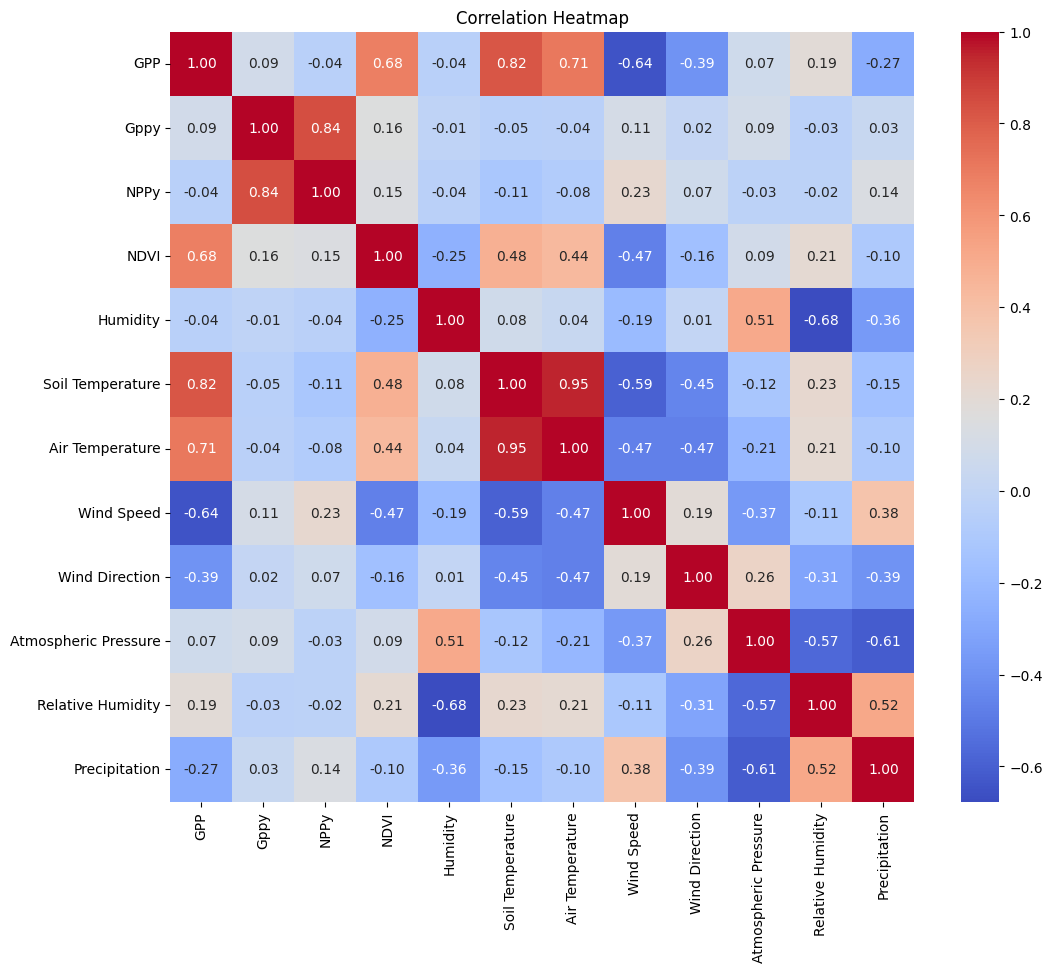

In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['GPP','Gppy', 'NPPy', 'NDVI', 'Humidity','Soil Temperature','Air Temperature'
                             ,'Wind Speed','Wind Direction','Atmospheric Pressure','Relative Humidity','Precipitation']

# Calculate the correlation matrix
correlation_matrix = final_data[columns_for_correlation].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Find pairs of features with correlation greater than 0.85
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > 0.80:
      print(f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have a correlation of {correlation_matrix.iloc[i, j]:.2f}')

GPP and Soil Temperature have a correlation of 0.82
Gppy and NPPy have a correlation of 0.84
Soil Temperature and Air Temperature have a correlation of 0.95


Since pairs such as (Gppy, Nppy) and (Soil Temperature, Air Temperature) have a high correlation we will drop Gppy and Air temperature.

In [ ]:
final_data.drop(columns=['Gppy','Air Temperature'], inplace= True)

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,NPPy,Npp,Humidity,Soil Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity,Precipitation
0,2015-10-15,39.225611,-92.119313,"{""type"":""Point"",""coordinates"":[-92.11931286178...",0.0255,0.213836,0.8622,0.015280,72.591061,18.750573,4.290341,227.117742,98.769305,28.497942,0.0
1,2015-10-15,39.225611,-92.119043,"{""type"":""Point"",""coordinates"":[-92.11904336719...",0.0280,0.213836,0.8569,0.016818,72.591061,18.750573,4.290341,227.117742,98.769305,28.497942,0.0
2,2015-10-15,39.225611,-92.118774,"{""type"":""Point"",""coordinates"":[-92.11877387261...",0.0296,0.228704,0.8533,0.017849,72.591061,18.750573,4.290341,227.117742,98.769305,28.497942,0.0
3,2015-10-15,39.225611,-92.118235,"{""type"":""Point"",""coordinates"":[-92.11823488344...",0.0305,0.240383,0.8399,0.018456,72.591061,18.750573,4.290341,227.117742,98.769305,28.497942,0.0
4,2015-10-15,39.225611,-92.117965,"{""type"":""Point"",""coordinates"":[-92.11796538885...",0.0309,0.240383,0.8592,0.018611,72.591061,18.750573,4.290341,227.117742,98.769305,28.497942,0.0


In [ ]:
final_data.shape

(16096, 15)

In [ ]:
final_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Missouri/Data_Mis_ASP/Final_merged_data.csv', index=False)